In [1]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from gensim.models import KeyedVectors

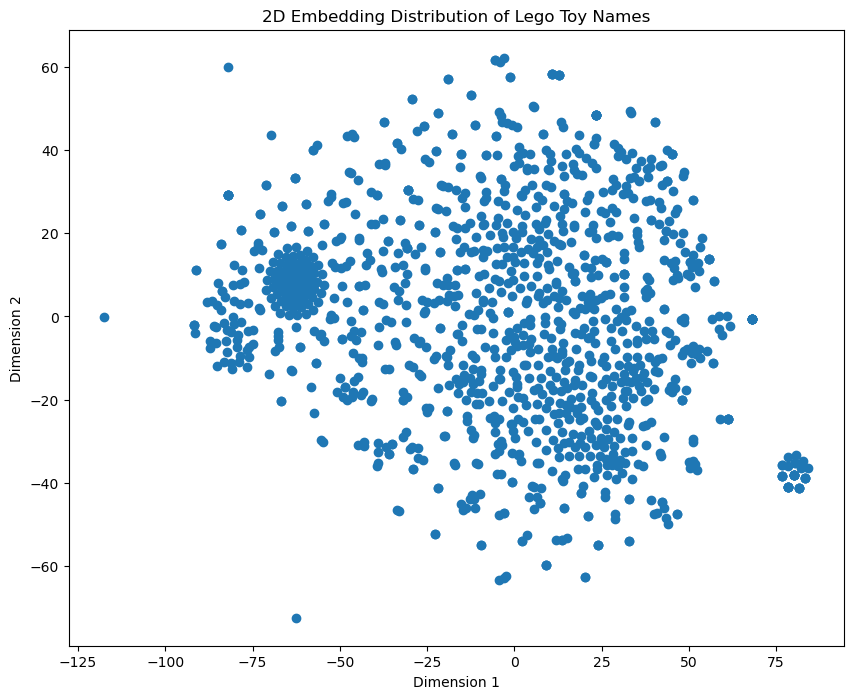

In [2]:

data = pd.read_csv('lego_data_clean_translated.csv')
toy_names = data['toy_name'].tolist()

model = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)

embeddings = []
for name in toy_names:
    words = name.split()
    embedding = np.zeros(model.vector_size)
    num_words = 0
    for word in words:
        if word in model.key_to_index:
            embedding += model[word]
            num_words += 1
    if num_words > 0:
        embedding /= num_words
    embeddings.append(embedding)

embeddings = np.array(embeddings)  

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

plt.figure(figsize=(10, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('2D Embedding Distribution of Lego Toy Names')
plt.show()

C:\Users\Preston Barney\AppData\Local\Temp\ipykernel_380152\3958147196.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', len(unique_collections))


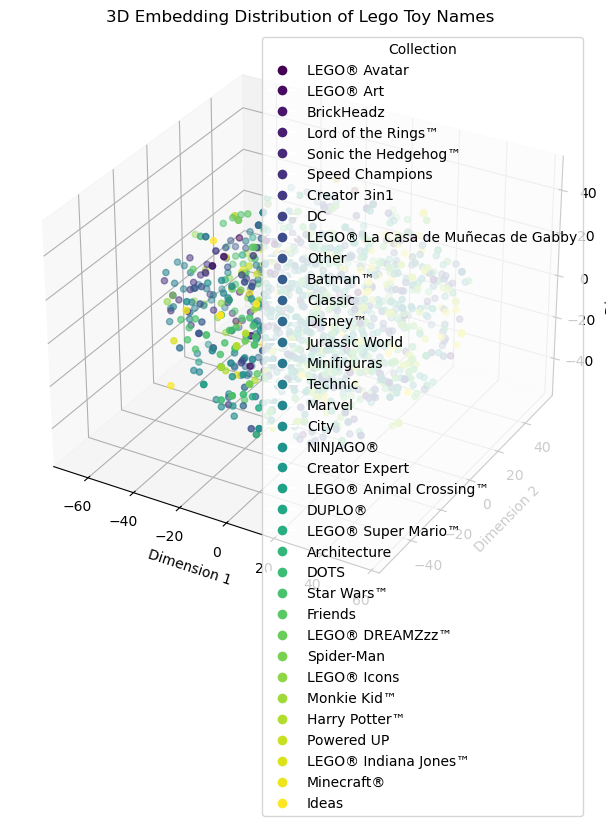

In [4]:
tsne = TSNE(n_components=3, random_state=42)
embeddings_3d = tsne.fit_transform(embeddings)

collections = data['colection'].tolist()
unique_collections = list(set(collections))
color_map = plt.cm.get_cmap('viridis', len(unique_collections))
colors = [color_map(unique_collections.index(collection)) for collection in collections]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(embeddings_3d[:, 0], embeddings_3d[:, 1], embeddings_3d[:, 2], c=colors)
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('3D Embedding Distribution of Lego Toy Names')

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map(i), markersize=8)
           for i in range(len(unique_collections))]
ax.legend(handles, unique_collections, title='Collection', loc='upper right')

plt.tight_layout()
plt.show()